# Energia e Magnetização de uma rede de spins

Segundo o artigo "The Hobbyhorse of Magnetic Systems: The Ising Model" de **E. Ibarra-García-Padilla et. al.**, o Hamiltoniano de sistemas magnéticos é dado por:

$$
  {\cal H} = - \frac{J}{2}\sum_{\langle ij\rangle}s_i \cdot s_j - \textbf{H} \cdot \sum_i s_i \space\space\space ,
$$

onde $\textbf{H}$ é o campo magnético externo aplicado e $J$ é a constante de interação de troca que determina o material do sistema, e a notação ${\langle ij\rangle}$ indica que o somatório é sobre todos os pares.

Normalmente, pode-se assumir que os spins apenas interagem com seus vizinhos imediatos.
Partindo desse conceito, e dado que em nossa simnulação não há campo magnético externo, a Energia total do nosso sistema é representada por:

$$
  E = -J \sum_{\langle ij\rangle} s_i \cdot s_j \space\space\space ,
$$



* A energia de cada sítio leva em consideração no somatório apenas os spins que estão nas proximidades imediatas.

Seguindo o artigo, a magnetização líquida da rede é dada por:

$$
  M = \sum_i s_i
$$

# The Ising Model

O modelo Ising 2D é amplamente utilizado para simular modelos magnéticos simples. Ele consiste em uma rede de spins virados ou pra cima ou pra baixo, conforme a figura extraída do livro Computational Physics do Mark Newman:

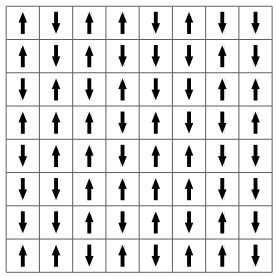



Para isso, se cria uma matriz com valores 1 (spin do sítio alinhado para cima) e -1 (spin do sítio alinhado para baixo) distribuídos aleatoriamente (de maneira uniforme) pela rede!

* Tentamos representar a magnetização por sítio a cada passo de Monte Carlo para três temperaturas
diferentes, conforme o artigo:

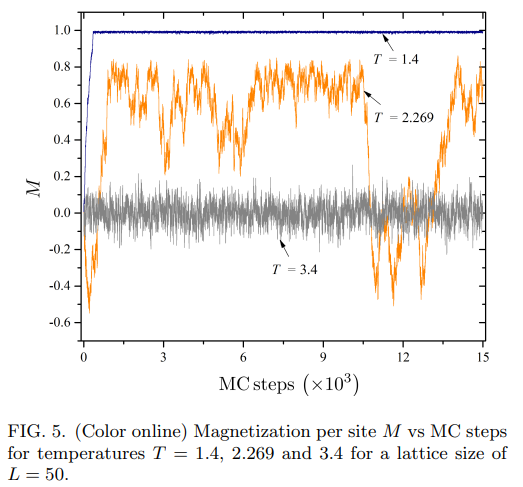









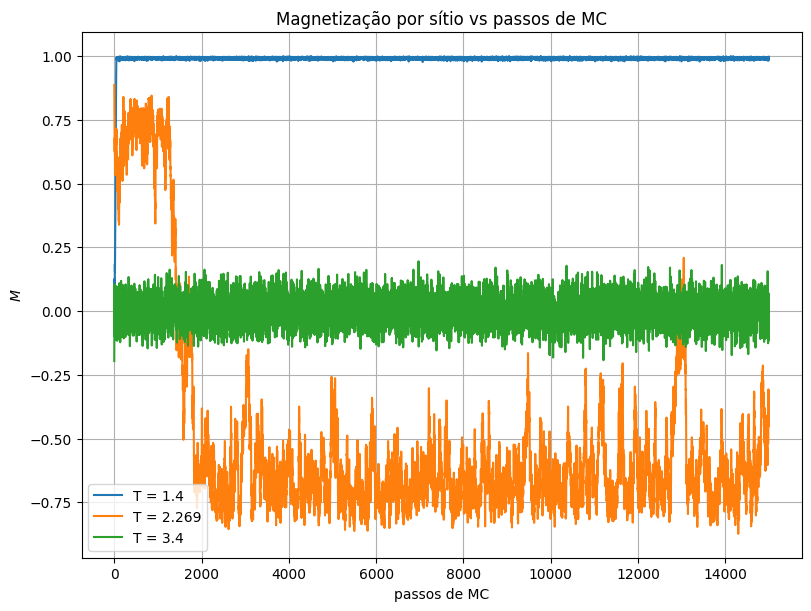

In [ ]:
#@title Código 1 : Magnetização em função do "tempo"
import numpy as np
import matplotlib.pyplot as plt

L2 = 50
rede2 = np.random.choice([1,-1],size=(L2,L2))
J = 1
steps = 15000
t_plot = np.arange(steps)

def metropolis2(rede,L,t):
    m = 0.0
    for i in range(L):
        for j in range(L):
            up     = rede[(i - 1) % L, j]
            down   = rede[(i + 1) % L, j]
            right  = rede[i, (j + 1) % L]
            left   = rede[i, (j - 1) % L]
            deltaE = 2.0*J*rede[i,j]*(up + down + right + left)
            if deltaE <= 0.0 or np.random.uniform(0,1) < np.exp(-deltaE/t):
                rede[i,j]=-rede[i,j]
            m += rede[i,j]
    return m/L/L

fig, ax = plt.subplots(figsize=(8, 6), layout='constrained')
for t2 in [1.4 , 2.269, 3.4]:
    m_plot = []
    for s in range(steps):
        m_plot.append( metropolis2(rede2,L2,t2) )
    ax.plot(t_plot,m_plot, label=f'T = {t2}')
ax.set(xlabel='passos de MC', ylabel=r'$M$', title = 'Magnetização por sítio vs passos de MC')
plt.legend()
plt.grid()
plt.show()

No caso, como a flutuação do momento magnético é um evento estocástico, a magnetização espontânea, que ocorre à temperaturas abaixo da temperatura crítica do sistema, por vezes estabilizava em um valor de -1, ou seja, como se todos os spins tivessem alinhados para baixo:

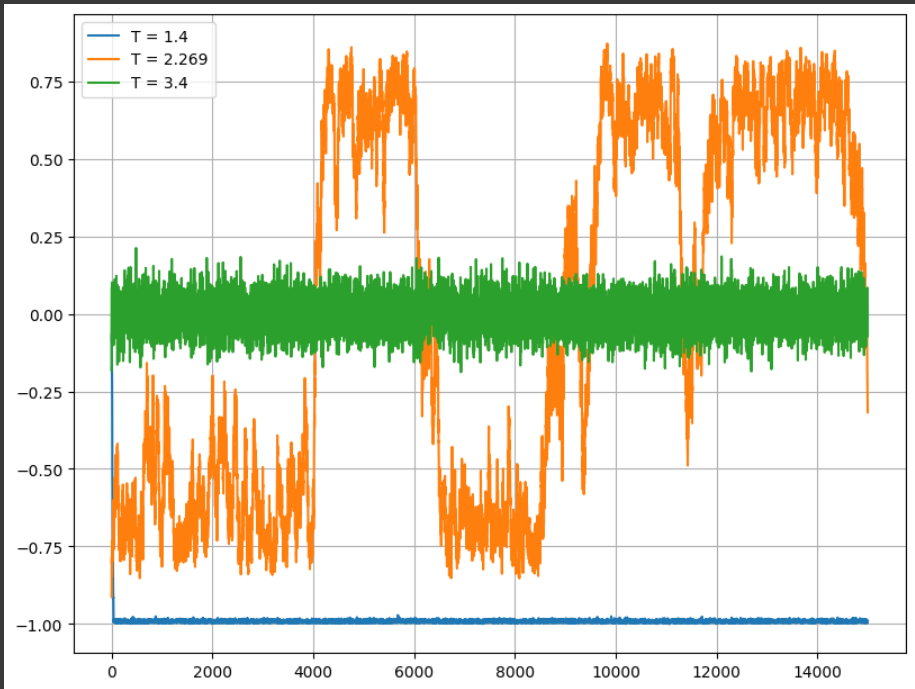



* Além disso, tentamos reproduzir o resultado a seguir, para a Magnetização por sítio em função da temperatura, para diferentes tamanhos da rede!

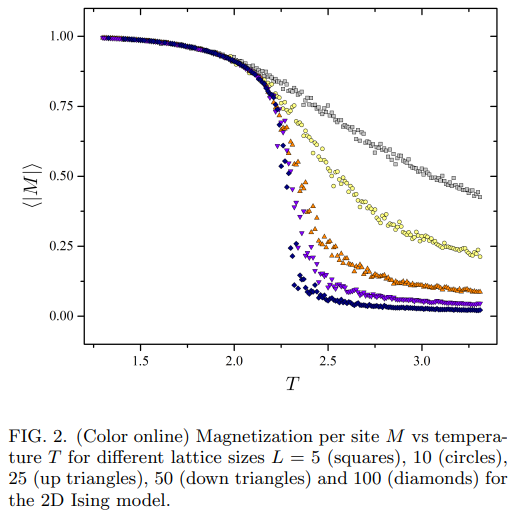

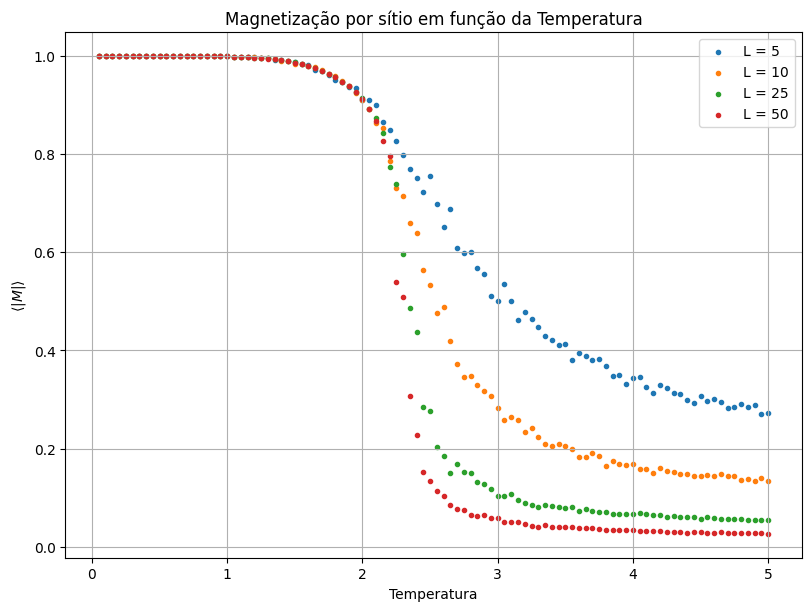

In [ ]:
#@title Código 2 : Magnetização em função da temperatura
import numpy as np
import matplotlib.pyplot as plt

passos = 1000                   # Passos de Monte Carlo
pontos = 100                    # Número de pontos gerados no gráfico
dt = 0.05                       # Passo de tempo
J = 1                           # Constante de Interação

def Termaliza(rede,L,t):
    for i in range(L):
        for j in range(L):
            # Condições de contorno:
            up     = rede[(i - 1) % L, j]
            down   = rede[(i + 1) % L, j]
            right  = rede[i, (j + 1) % L]
            left   = rede[i, (j - 1) % L]
            # Variação da energia por flip:
            deltaE = 2.0*J*rede[i,j]*(up + down + right + left)
            # Metropolis:
            if deltaE <= 0.0 or np.random.uniform(0,1) < np.exp(-deltaE/t):
                rede[i,j]=-rede[i,j]

def Magnetization(rede,L,t):
    m = 0.0
    for i in range(L):
        for j in range(L):
            # Condições de contorno:
            up    = rede[(i - 1) % L, j]
            down  = rede[(i + 1) % L, j]
            right = rede[i, (j + 1) % L]
            left  = rede[i, (j - 1) % L]
            # Variação da energia por flip:
            deltaE = 2.0*J*rede[i,j]*(up + down + right + left)
            # Metropolis:
            if deltaE <= 0.0 or np.random.uniform(0,1) < np.exp(-deltaE/t):
                rede[i,j]=-rede[i,j]
            m += rede[i,j]
    return m/L/L

# Criando o gráfico:
fig, ax = plt.subplots(figsize=(8, 6), layout='constrained')

# Simulando diferentes tamanhos de rede:
for L in [5,10,25,50]:
    # Cria uma rede com os valores 1 e -1 aleatórios.
    rede = np.random.choice([1,-1],size=(L,L))
    # Listas para os plots.
    plott=[]
    plotm=[]

    t = 0. # temperatura "inicial"
    for p in range(pontos):
        t += dt
        # Termalização:
        for k in range(1500):
            Termaliza(rede, L, t)
        # Main:
        ms = 0
        for k in range(passos):
            ms += abs( Magnetization(rede, L, t) )

        m = ms/passos             # Valores da magnetização do sistema normalizados
        # Alimentando os plots:
        plott.append(t)
        plotm.append(m)

    ax.scatter(plott,plotm,marker='.', label=f'L = {L}')

ax.set(xlabel='Temperatura', ylabel=r'$\langle\vert M\vert\rangle$', title = 'Magnetização por sítio em função da Temperatura')
plt.legend()
plt.grid()
plt.show()